# Dependencies

In [50]:
from datetime import datetime, timedelta
import yahoo_fin.stock_info as si
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pystock.stock_scanner import Stock, StockScanner, Model, save_model
from pystock.indicators import Indicator
from pystock.alerts import alert

# autoreload magic command
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import importlib
import pystock.stock_scanner
importlib.reload(pystock.stock_scanner)

<module 'pystock.stock_scanner' from 'c:\\Users\\matth\\Dropbox\\Matthew\\7_Hobby\\Programming\\Python_projects\\Stock_market\\pystock\\repository\\pystock\\stock_scanner.py'>

# Stock data

In [21]:
data = yf.download(tickers='TSLA', period='7d', interval='1h') 
# Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
#Print data
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2023-06-12 09:30:00-04:00,248.500000,249.919998,245.880005,247.313904,247.313904,44059894
2023-06-12 10:30:00-04:00,247.313904,248.300003,244.589996,246.809097,246.809097,27128907
2023-06-12 11:30:00-04:00,246.809998,247.979996,245.500000,246.929703,246.929703,15418590
2023-06-12 12:30:00-04:00,246.934296,247.990005,246.320007,247.107498,247.107498,12490392
2023-06-12 13:30:00-04:00,247.110001,249.399994,246.699997,248.929901,248.929901,17599506


In [4]:
data.index

DatetimeIndex(['2023-06-02 09:30:00-04:00', '2023-06-02 10:30:00-04:00',
               '2023-06-02 11:30:00-04:00', '2023-06-02 12:30:00-04:00',
               '2023-06-02 13:30:00-04:00', '2023-06-02 14:30:00-04:00',
               '2023-06-02 15:30:00-04:00', '2023-06-02 16:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [36]:
tsla_indicators = Indicator(data, period=4)
tsla_indicators.get_indicators()

In [39]:
tsla_indicators.df.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA4,STD4,Upper,Lower,EWMA4,Momentum4,Log
2023-06-21 12:30:00-04:00,261.885010,263.000000,257.779999,259.089996,259.089996,24049713,263.262970,3.685963,270.634896,255.891044,262.942096,-5.600086,5.557175
2023-06-21 13:30:00-04:00,259.071899,263.970001,258.970001,263.859985,263.859985,20497513,262.280792,2.364636,267.010064,257.551520,263.309252,-1.467094,5.575419
2023-06-21 14:30:00-04:00,263.859985,264.700012,262.089996,263.119995,263.119995,19780526,261.993294,2.096922,266.187138,257.799450,263.233549,-0.435159,5.572610
2023-06-21 15:30:00-04:00,263.130005,263.519989,259.269989,259.459991,259.459991,14043998,261.382492,2.456857,266.296206,256.468779,261.724126,-0.932866,5.558603
2023-06-21 16:00:00-04:00,259.459991,259.459991,259.459991,259.459991,259.459991,0,261.474991,2.346251,266.167493,256.782489,260.818472,0.142806,5.558603


In [38]:
tsla_indicators.df['Upper'][-1]

266.16749308192993

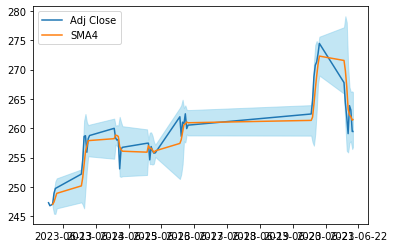

In [55]:
plt.plot(tsla_indicators.df['Adj Close'], label='Adj Close')
plt.plot(tsla_indicators.df['SMA4'], label='SMA4') 
# shade the area between upper and lower band
plt.fill_between(tsla_indicators.df.index, tsla_indicators.df['Upper'], tsla_indicators.df['Lower'], color='skyblue', alpha=0.5)

#plt.plot(tsla_indicators.df['Momentum4'], label='Momentum4')
plt.legend()

In [51]:
alert('TSLA')

[*********************100%***********************]  1 of 1 completed
Price is below upper band


In [2]:
# stock data using the Stock class in stock_scanner.py
s = Stock('RKT')
s.download_data()

# Stock scanner

In [10]:
%%time
## Idea: run script before market close to decide whether to buy/ sell. 

# Scan for high volume stocks (5 standard deviations from 30 day mean)
ss = StockScanner()
ss.get_high_vol_stocks(ss.tickers_nasdaq, threshold=5)
#ss.get_train_data_for_my_stocks()

# Save high vol tickers
pd.Series(ss.tickers_high_vol).to_csv(f'./output/{datetime.now().date()}-high_vol_stocks.csv', index=False, header=False)


Ticker not found: BT.L


  2%|▏         | 92/5723 [00:08<08:52, 10.57it/s]

{'chart': {'result': None, 'error': {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}}}
ADEAV invalid.


  2%|▏         | 125/5723 [00:12<08:52, 10.50it/s]c:\Users\matth\Dropbox\Matthew\7_Hobby\Programming\Python_projects\Stock_market\pystock\repository\pystock\stock_scanner.py:382: RuntimeWarning: invalid value encountered in double_scalars
  self.stock_picks[tk] = Stock(tk)
  7%|▋         | 421/5723 [00:48<13:38,  6.47it/s]c:\Users\matth\Dropbox\Matthew\7_Hobby\Programming\Python_projects\Stock_market\pystock\repository\pystock\stock_scanner.py:382: RuntimeWarning: divide by zero encountered in double_scalars
  self.stock_picks[tk] = Stock(tk)
 12%|█▏        | 674/5723 [01:17<07:58, 10.56it/s]

'timestamp'
BIOSW invalid.


 20%|█▉        | 1128/5723 [02:38<57:58,  1.32it/s]  

'timestamp'
CLOER invalid.


 20%|█▉        | 1136/5723 [02:44<58:51,  1.30it/s]  

'timestamp'
CLRCR invalid.


 29%|██▉       | 1667/5723 [06:48<54:10,  1.25it/s]  

'timestamp'
ENERR invalid.


 37%|███▋      | 2089/5723 [09:22<43:22,  1.40it/s]  

'timestamp'
FXCOR invalid.


 37%|███▋      | 2138/5723 [09:45<05:50, 10.24it/s]  

'timestamp'
GDEVW invalid.


 43%|████▎     | 2434/5723 [10:50<43:18,  1.27it/s]

'timestamp'
HHGCR invalid.


 43%|████▎     | 2462/5723 [11:15<43:53,  1.24it/s]

'timestamp'
HMACR invalid.


 44%|████▎     | 2491/5723 [11:41<44:43,  1.20it/s]

'timestamp'
HORIW invalid.


 50%|████▉     | 2853/5723 [13:22<34:08,  1.40it/s]

'timestamp'
JGGCR invalid.


 50%|█████     | 2883/5723 [13:49<37:38,  1.26it/s]

'timestamp'
JWACR invalid.


 50%|█████     | 2890/5723 [13:55<36:30,  1.29it/s]

'timestamp'
KACLR invalid.


 57%|█████▋    | 3273/5723 [15:54<31:03,  1.31it/s]  

'timestamp'
MBTCR invalid.


 57%|█████▋    | 3281/5723 [16:00<29:02,  1.40it/s]

'timestamp'
MCACR invalid.


 57%|█████▋    | 3285/5723 [16:03<31:33,  1.29it/s]

'timestamp'
MCAER invalid.


 57%|█████▋    | 3288/5723 [16:05<32:31,  1.25it/s]

'timestamp'
MCAFR invalid.


 58%|█████▊    | 3291/5723 [16:07<28:17,  1.43it/s]

'timestamp'
MCAGR invalid.


 67%|██████▋   | 3812/5723 [20:05<28:33,  1.12it/s]

'timestamp'
ONFOW invalid.


 89%|████████▉ | 5082/5723 [27:31<07:59,  1.34it/s]

'timestamp'
THACW invalid.


 93%|█████████▎| 5334/5723 [29:23<00:38, 10.20it/s]

'timestamp'
VBOCW invalid.


 96%|█████████▌| 5479/5723 [29:41<02:19,  1.75it/s]

'timestamp'
VTAQR invalid.


 97%|█████████▋| 5549/5723 [30:44<02:26,  1.19it/s]

'timestamp'
WHLRL invalid.


 97%|█████████▋| 5558/5723 [30:53<02:23,  1.15it/s]

'timestamp'
WINVR invalid.


 98%|█████████▊| 5598/5723 [31:27<01:43,  1.20it/s]

'timestamp'
WTMAR invalid.


100%|█████████▉| 5714/5723 [32:00<00:00, 10.24it/s]

{'chart': {'result': None, 'error': {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}}}
ZVZZC invalid.


100%|█████████▉| 5720/5723 [32:00<00:00, 10.25it/s]

{'chart': {'result': None, 'error': {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}}}
ZXYZ.A invalid.


100%|██████████| 5723/5723 [32:00<00:00,  2.98it/s]

Wall time: 32min 5s


In [ ]:
# After scanning the high volume stocks, we should discard all the losing stocks (red day).
# Discard tickers with less than 1% move. 

# Price predictor

In [ ]:
# Model 1
m = Model(RandomForestClassifier(), ss)
m.train(partial_fit=False)
m.predict()
m.get_accuracy()


In [ ]:
## Model 2
m2 = Model(SGDClassifier(loss='log'), ss)
m2.train(partial_fit=True)
m2.predict()
m2.get_accuracy()


In [ ]:
## Predict today
# df = predict_today(m.model, ss.my_stocks)
# df.to_csv(f'./output/{datetime.now().date()}-high_vol_stocks.csv', index=False, header=False)

# Worst performing stocks since pandemic (2020 Feb)

In [2]:
## Idea: run script before market close to decide whether to buy/ sell. 

# Scan for high volume stocks (5 standard deviations from 30 day mean)
ss = StockScanner()
#ss.get_high_vol_stocks(ss.tickers_nasdaq, threshold=5)
#ss.get_train_data_for_my_stocks()

# Save high vol tickers
#pd.Series(ss.tickers_high_vol).to_csv(f'./output/{datetime.now().date()}-high_vol_stocks.csv', index=False, header=False)


In [8]:
# loop through each stock and find tickers which are still XX% below 2020 Feb price levels. E.g. XX=40
# Get uk stocks: ftse100, and ftse200

In [ ]:
stock = Stock(ss.tickers_ftse100[5], True)
stock.technical

In [7]:
from datetime import datetime, timedelta
datetime.now()-timedelta(days=504)


datetime.datetime(2020, 2, 25, 14, 30, 29, 569239)

In [ ]:
from yahoo_fin import stock_info as si 

si.get_data('TSLA', start_date='2020-02-20', end_date=None, interval='1d')

In [ ]:
ss = StockScanner()
ss.get_cheap_stocks(ss.tickers_ftse100)
cheap_ftse100 = ss.stock_picks

In [6]:
ss.get_cheap_stocks(ss.tickers_ftse250)
cheap_ftse250 = ss.stock_picks

100%|██████████| 250/250 [00:33<00:00,  7.53it/s]


In [8]:
my_stock_picks = {**cheap_ftse100, **cheap_ftse250}

In [9]:
my_stock_picks

{'IAG.L': <pystock.stock_scanner.Stock at 0x1fbb1afe948>,
 'RR.L': <pystock.stock_scanner.Stock at 0x1fbb0ff1048>,
 'STJ.L': <pystock.stock_scanner.Stock at 0x1fb8d722c48>,
 'CCL.L': <pystock.stock_scanner.Stock at 0x1fbb143c048>,
 'CINE.L': <pystock.stock_scanner.Stock at 0x1fbb16eae08>,
 'CPI.L': <pystock.stock_scanner.Stock at 0x1fbb16fd908>,
 'GNC.L': <pystock.stock_scanner.Stock at 0x1fbb13dec08>,
 'HMSO.L': <pystock.stock_scanner.Stock at 0x1fbb13e4448>,
 'NETW.L': <pystock.stock_scanner.Stock at 0x1fbb146d088>,
 'RNK.L': <pystock.stock_scanner.Stock at 0x1fbb1483608>,
 'SSPG.L': <pystock.stock_scanner.Stock at 0x1fbb1406348>,
 'TCAP.L': <pystock.stock_scanner.Stock at 0x1fbb140ad88>,
 'TRN.L': <pystock.stock_scanner.Stock at 0x1fbb132ab08>,
 'TUI.L': <pystock.stock_scanner.Stock at 0x1fbb14ba048>,
 'WG.L': <pystock.stock_scanner.Stock at 0x1fbb1425708>}